# Beispiel mit Boston Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

c:\Users\gutsc\anaconda3\envs\tf_udemy\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

In [3]:
np.random.seed(42)

x = dataset.data[:, :] # Alle Features nutzen
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [4]:
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
r2_score = regr.score(x_test, y_test)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2_own: {r2_score}")

Coef: [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
Intercept: 31.63108403569312
R2_own: 0.7112260057484909


In [5]:
def plot_residual(regr, x_train, y_train, x_test, y_test): 
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)

    min_val = min(np.min(y_pred_train), np.min(y_pred_test))   
    max_val = max(np.max(y_pred_train), np.max(y_pred_test))

    plt.scatter(y_pred_train, y_pred_train - y_train, color = "blue")
    plt.scatter(y_pred_test, y_pred_test - y_test, color = "red")
    plt.hlines(y = 0, xmin = min_val, xmax = max_val)
    plt.legend(["Train", "Test"])
    plt.show()


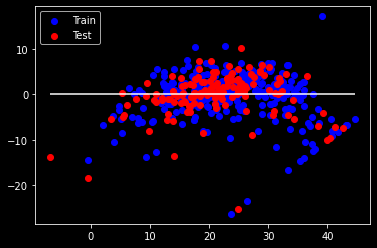

In [6]:
plot_residual(regr, x_train, y_train, x_test, y_test)